In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading training and test data

In [2]:
def load_dataset(path):
    sentences = []
    labels = []
    sentence =[]
    ner_tags = []

    with open(path, encoding='utf-8') as file:
        for line in file:
            if line.strip() == "":
                if sentence:
                    sentences.append(sentence)
                    labels.append(ner_tags)

                    sentence = []
                    ner_tags =[]
            else:
                splits = line.strip().split()
                if len(splits) > 2:
                    token = splits[0]
                    ner = splits[-1]

                    if token == "-DOCSTART-":
                        continue

                    sentence.append(token)
                    ner_tags.append(ner)
        
        if sentence:
           sentences.append(sentence)
           labels.append(ner_tags)

    return sentences, labels

In [3]:
# Use the CoNLL-2003 dataset

path_train = '../DataAccess/Datasets/NER/train.txt'
sentences_train, labels_train = load_dataset(path_train)

In [4]:
path_test='../DataAccess/Datasets/NER/test.txt'
sentences_test, labels_test=load_dataset(path_test)

### Build vocabularies:

In [5]:
def do_word2idx(sentences, input_type):
    if input_type == 1:
        word2idx= {"PAD":0, "UNK":1}
        start_idx = 2
    else:
        word2idx= {"PAD":0}
        start_idx = 1

    for sentence in sentences:
        for word in sentence:
            if word not in word2idx:            
                word2idx[word]= start_idx
                start_idx += 1

    return word2idx            

In [6]:
word2idx = do_word2idx(sentences_train, 1)
word2idx

{'PAD': 0,
 'UNK': 1,
 'EU': 2,
 'rejects': 3,
 'German': 4,
 'call': 5,
 'to': 6,
 'boycott': 7,
 'British': 8,
 'lamb': 9,
 '.': 10,
 'Peter': 11,
 'Blackburn': 12,
 'BRUSSELS': 13,
 '1996-08-22': 14,
 'The': 15,
 'European': 16,
 'Commission': 17,
 'said': 18,
 'on': 19,
 'Thursday': 20,
 'it': 21,
 'disagreed': 22,
 'with': 23,
 'advice': 24,
 'consumers': 25,
 'shun': 26,
 'until': 27,
 'scientists': 28,
 'determine': 29,
 'whether': 30,
 'mad': 31,
 'cow': 32,
 'disease': 33,
 'can': 34,
 'be': 35,
 'transmitted': 36,
 'sheep': 37,
 'Germany': 38,
 "'s": 39,
 'representative': 40,
 'the': 41,
 'Union': 42,
 'veterinary': 43,
 'committee': 44,
 'Werner': 45,
 'Zwingmann': 46,
 'Wednesday': 47,
 'should': 48,
 'buy': 49,
 'sheepmeat': 50,
 'from': 51,
 'countries': 52,
 'other': 53,
 'than': 54,
 'Britain': 55,
 'scientific': 56,
 'was': 57,
 'clearer': 58,
 '"': 59,
 'We': 60,
 'do': 61,
 "n't": 62,
 'support': 63,
 'any': 64,
 'such': 65,
 'recommendation': 66,
 'because': 67,
 '

In [7]:
label2idx = do_word2idx(labels_train, 2)
label2idx

{'PAD': 0,
 'I-ORG': 1,
 'O': 2,
 'I-MISC': 3,
 'I-PER': 4,
 'I-LOC': 5,
 'B-LOC': 6,
 'B-MISC': 7,
 'B-ORG': 8}

### Convert words and labels to sequences of indices

In [8]:
sentences_train_int = [[word2idx[word] for word in subset] for subset in sentences_train]
sentences_train_int

[[2, 3, 4, 5, 6, 7, 8, 9, 10],
 [11, 12],
 [13, 14],
 [15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  4,
  24,
  6,
  25,
  6,
  26,
  8,
  9,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  6,
  37,
  10],
 [38,
  39,
  40,
  6,
  41,
  16,
  42,
  39,
  43,
  44,
  45,
  46,
  18,
  19,
  47,
  25,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  27,
  41,
  56,
  24,
  57,
  58,
  10],
 [59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  61,
  62,
  69,
  64,
  70,
  71,
  21,
  72,
  59,
  41,
  17,
  39,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  10],
 [83,
  18,
  84,
  56,
  85,
  57,
  86,
  87,
  88,
  21,
  57,
  89,
  90,
  91,
  57,
  92,
  21,
  48,
  35,
  93,
  94,
  41,
  16,
  42,
  10],
 [83,
  18,
  80,
  95,
  96,
  97,
  94,
  2,
  98,
  99,
  100,
  101,
  6,
  102,
  37,
  103,
  72,
  104,
  87,
  105,
  106,
  51,
  41,
  107,
  87,
  108,
  109,
  110,
  57,
  80,
  111,
  112,
  87,
  113,
  114,
  6,
  115,
 

In [9]:
labels_train_int = [[label2idx[label] for label in subset] for subset in labels_train]
labels_train_int

[[1, 2, 3, 2, 2, 2, 3, 2, 2],
 [4, 4],
 [5, 2],
 [2,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [5,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  4,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  5,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  4,
  4,
  4,
  4,
  2,
  2,
  2,
  2,
  2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
 [2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  4,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [4,
  2,
  3,
  2,
  2,
  2,
  2,
  5,
  2,
  5,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2],
 [2,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,

In [10]:
sentences_test_int = [[word2idx.get(word, word2idx['UNK']) for word in subset] for subset in sentences_test]
sentences_test_int

[[1892, 677, 1, 1, 1, 3396, 72, 21355, 2338, 1, 10616, 10],
 [1, 1],
 [1, 72, 869, 1140, 1141, 1],
 [1808,
  1397,
  41,
  3411,
  163,
  202,
  6200,
  1907,
  2143,
  23,
  80,
  7124,
  1896,
  2520,
  789,
  706,
  237,
  80,
  8175,
  8522,
  2725,
  1909,
  19,
  1163,
  10],
 [135,
  355,
  5003,
  202,
  4217,
  5286,
  1153,
  237,
  41,
  519,
  1909,
  163,
  41,
  403,
  72,
  8531,
  6,
  80,
  4333,
  2542,
  4178,
  6,
  19393,
  1,
  10],
 [355,
  1180,
  996,
  163,
  41,
  1909,
  87,
  5003,
  5033,
  4322,
  7038,
  27,
  41,
  2618,
  2516,
  1691,
  1,
  2355,
  1,
  1,
  812,
  7192,
  163,
  80,
  1,
  798,
  10504,
  6,
  12713,
  41,
  7057,
  823,
  41,
  4292,
  379,
  12678,
  87,
  311,
  158,
  8486,
  1460,
  10],
 [1,
  1,
  3735,
  5126,
  163,
  41,
  2520,
  237,
  4243,
  382,
  72,
  7056,
  158,
  1,
  1222,
  7009,
  3232,
  51,
  2023,
  979,
  41,
  4136,
  10],
 [15,
  324,
  6605,
  1192,
  57,
  4219,
  237,
  158,
  6200,
  1907,
  3435,
  

In [11]:
labels_int_test = [[label2idx[label] for label in subset] for subset in labels_test]
labels_int_test

[[2, 2, 5, 2, 2, 2, 2, 4, 2, 2, 2, 2],
 [4, 4],
 [5, 2, 5, 5, 5, 2],
 [5, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2],
 [5,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  4,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2],
 [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  5,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  5,
  2],
 [4,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  4,
  4,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  4,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2],
 [2,
  4,


### Pad sequences to equal length

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
X_padded_train = pad_sequences(sentences_train_int, 
                         padding='post', # Add padding value at the end of the sentence
                         value=word2idx['PAD'])

y_Padded_train = pad_sequences(labels_train_int,
                         padding='post',
                         value=label2idx['PAD'])

In [14]:
X_padding_test = pad_sequences(sentences_test_int,
                               padding='post',
                               value=word2idx['PAD'])

y_Padding_test= pad_sequences(labels_int_test,
                              padding='post',
                              value=label2idx['PAD'])

### Create Model

### 1- RNN

In [15]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [16]:
input_size = len(X_padded_train[0])
input_dim = len(word2idx)
tag_no = len(label2idx)
print(input_size, input_dim, tag_no)

113 23625 9


In [17]:
# One-Hot Encode the Labels
y_Padded_train = to_categorical(y_Padded_train, num_classes=tag_no)

y_Padding_test= to_categorical(y_Padding_test, num_classes=tag_no)

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(X_padded, y_Padded, random_state=42, shuffle=True, test_size=0.2)

In [19]:
model_rnn = tf.keras.Sequential()
model_rnn.add(tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, input_length=input_size))
model_rnn.add(tf.keras.layers.SimpleRNN(units=64, return_sequences=True))
# model_rnn.add(tf.keras.layers.SimpleRNN(units=128, return_sequences=True))
# model_rnn.add(tf.keras.layers.SimpleRNN(units=256, return_sequences=True))

model_rnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_rnn.add(tf.keras.layers.Dropout(0.5))

model_rnn.add(tf.keras.layers.Dense(units=tag_no, activation='softmax'))

model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.build(input_shape=(None, input_size))
model_rnn.summary()

f:\Python\FastAPI\env_bert\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 113, 64)        │     1,512,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 113, 64)        │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 113, 64)        │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 113, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 113, 9)         │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,525,001 (5.82 MB)

 Trainable params: 1,525,001 (5.82 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
epochs=20
batch_size=64

call_back = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=6)

history = model_rnn.fit(X_padded_train, y_Padded_train, epochs=epochs, batch_size=batch_size, callbacks=call_back, validation_data=(X_padding_test, y_Padding_test))

Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8970 - loss: 0.3985 - val_accuracy: 0.9811 - val_loss: 0.0584
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9804 - loss: 0.0587 - val_accuracy: 0.9862 - val_loss: 0.0387
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9880 - loss: 0.0346 - val_accuracy: 0.9898 - val_loss: 0.0313
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9920 - val_loss: 0.0260
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9966 - loss: 0.0123 - val_accuracy: 0.9930 - val_loss: 0.0253
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9981 - loss: 0.0076 - val_accuracy: 0.9928 - val_loss: 0.0275
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9986 - loss: 0.0052 - val_accuracy: 0.9928 - val_loss: 0.0305
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9990 - loss: 0.0038 - val_accu

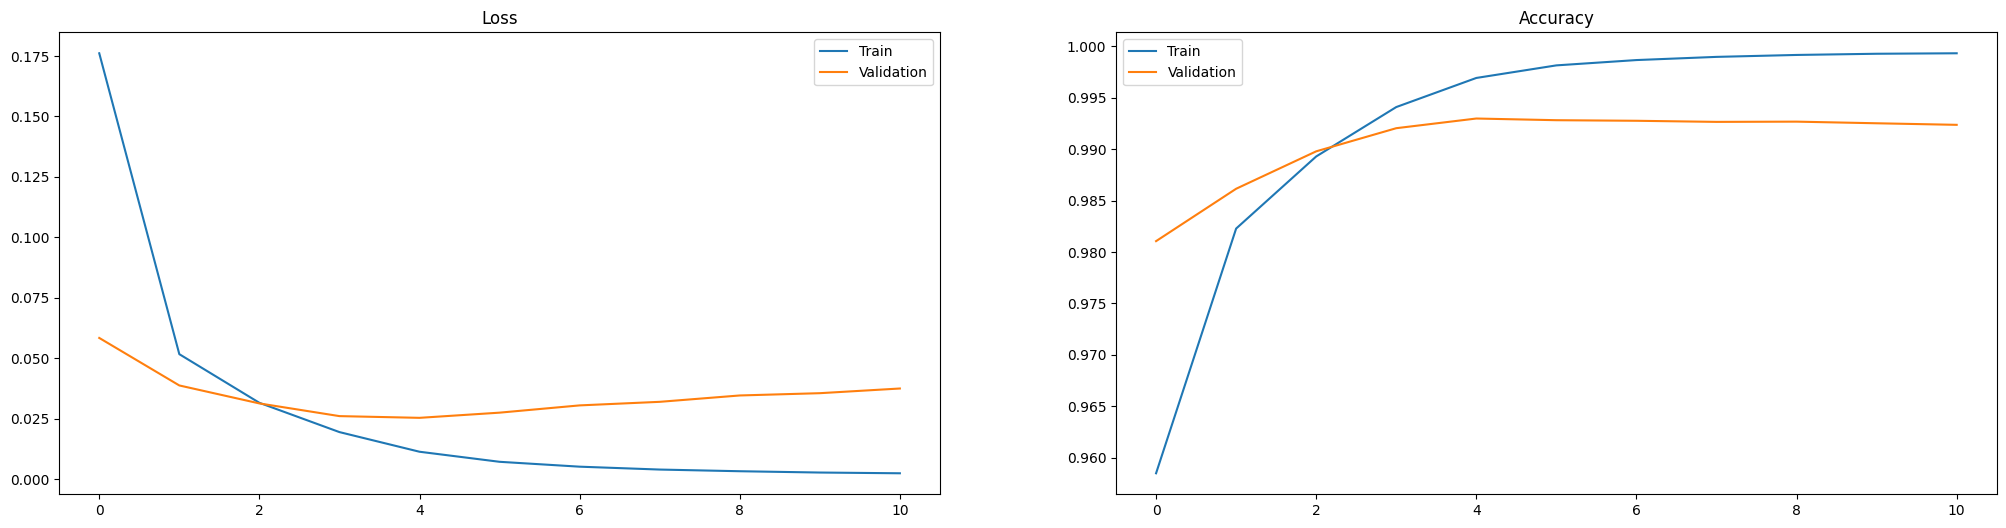

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

In [22]:
y_pred = model_rnn.predict(X_padding_test)

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [23]:
# Convert both arrays from one-hot to class index format
y_pred_labels = np.argmax(y_pred, axis=-1)
y_test_labels = np.argmax(y_Padding_test, axis=-1)


# Remove "PAD"
mask = y_test_labels.flatten() != label2idx['PAD']
y_true = y_test_labels.flatten()[mask]
y_pred = y_pred_labels.flatten()[mask]


accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1Score = f1_score(y_true, y_pred, average='macro')
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall:   {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'f1_score: {f1Score:.4f}')

Accuracy: 0.9353
Recall:   0.4099
Precision: 0.4566
f1_score: 0.4309


f:\Python\FastAPI\env_bert\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Python\FastAPI\env_bert\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
labels = np.unique(np.concatenate((y_true, y_pred)))

cf = confusion_matrix(y_true, y_pred, labels=labels)
cf

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    1,  1523,   599,    69,    73,   226,     0,     0,     0],
       [    1,   129, 37879,   106,   193,    15,     0,     0,     0],
       [    2,    74,   238,   538,    26,    31,     0,     0,     0],
       [    2,    57,   669,    11,  2008,    26,     0,     0,     0],
       [    1,   145,   172,    61,    56,  1484,     0,     0,     0],
       [    0,     1,     2,     0,     0,     3,     0,     0,     0],
       [    0,     1,     2,     4,     0,     2,     0,     0,     0],
       [    0,     5,     0,     0,     0,     0,     0,     0,     0]])

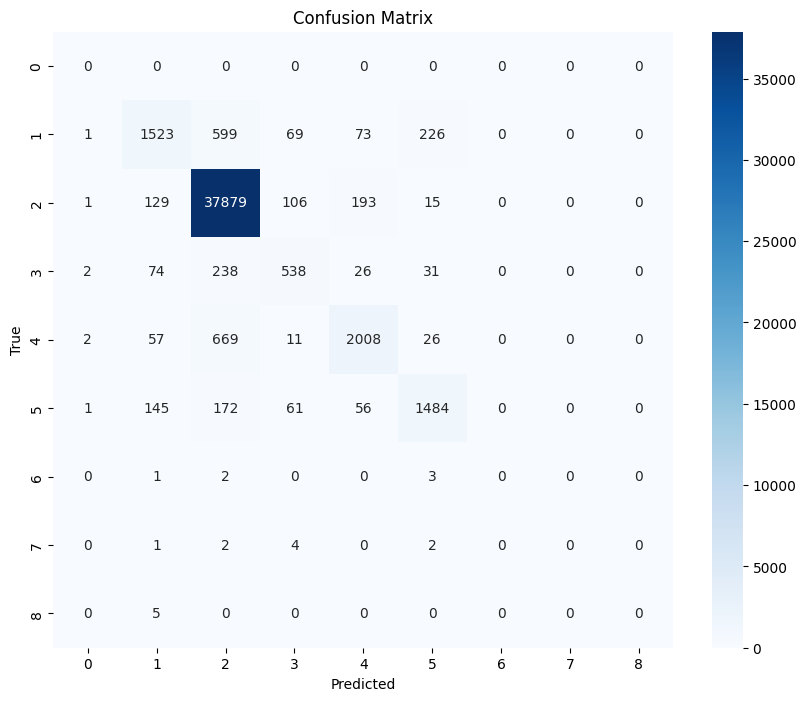

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### 2-BiLSTM

In [26]:
model_bilstm= tf.keras.Sequential()
model_bilstm.add(tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, input_length=input_size))
model_bilstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True)))

model_bilstm.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_bilstm.add(tf.keras.layers.Dropout(0.5))

model_bilstm.add(tf.keras.layers.Dense(units=tag_no, activation='softmax'))

model_bilstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_bilstm.build(input_shape=(None, input_size))
model_bilstm.summary()

f:\Python\FastAPI\env_bert\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 113, 64)        │     1,512,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 113, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 113, 64)        │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 113, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 113, 9)         │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,586,889 (6.05 MB)

 Trainable params: 1,586,889 (6.05 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
epochs=20
batch_size=64

call_back = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=6)
history = model_bilstm.fit(X_padded_train, y_Padded_train, epochs=epochs, batch_size=batch_size, callbacks=call_back, validation_data=(X_padding_test, y_Padding_test))

Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9298 - loss: 0.3419 - val_accuracy: 0.9814 - val_loss: 0.0540
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9821 - loss: 0.0513 - val_accuracy: 0.9871 - val_loss: 0.0355
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9891 - loss: 0.0305 - val_accuracy: 0.9899 - val_loss: 0.0313
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9927 - val_loss: 0.0278
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9971 - loss: 0.0111 - val_accuracy: 0.9931 - val_loss: 0.0270
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9985 - loss: 0.0063 - val_accuracy: 0.9931 - val_loss: 0.0299
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9934 - val_loss: 0.0297
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9994 - loss: 0.0026 - val_ac

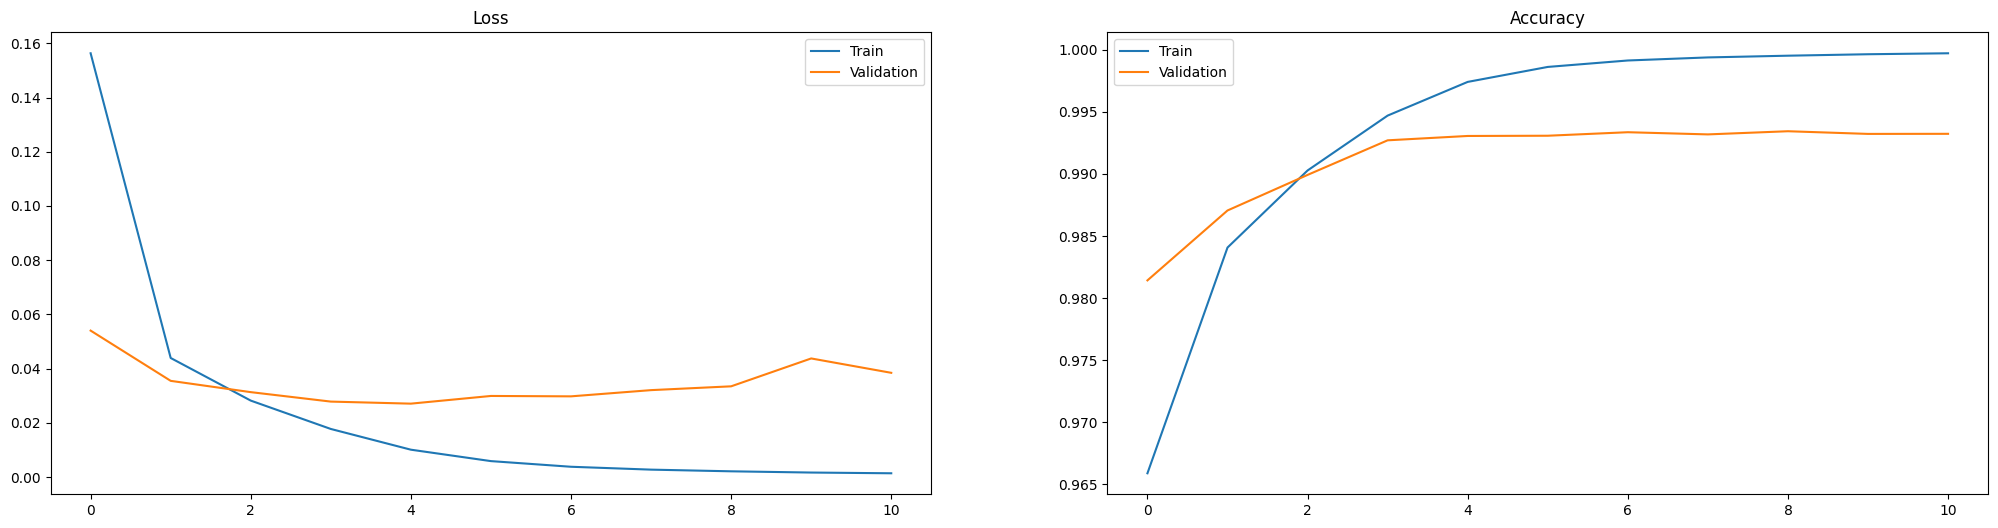

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

In [29]:
y_pred = model_bilstm.predict(X_padding_test)

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [30]:
# Convert both arrays from one-hot to class index format
y_pred_labels = np.argmax(y_pred, axis=-1)
y_test_labels = np.argmax(y_Padding_test, axis=-1)


# Remove "PAD"
mask = y_test_labels.flatten() != label2idx['PAD']
y_true = y_test_labels.flatten()[mask]
y_pred = y_pred_labels.flatten()[mask]


accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1Score = f1_score(y_true, y_pred, average='macro')
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall:   {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'f1_score: {f1Score:.4f}')

Accuracy: 0.9359
Recall:   0.4797
Precision: 0.5202
f1_score: 0.4983


f:\Python\FastAPI\env_bert\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Using Transformer

### DistilBERT

In [79]:
from datasets import load_dataset

In [80]:
dataset= load_dataset('conll2003')

dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [81]:
dataset_train = dataset['train']
dataset_validation=dataset['validation']
dataset_test=dataset['test']

In [84]:
from transformers import DistilBertTokenizer, TFDistilBertForTokenClassification

In [85]:
tokenizer=DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [86]:
X_train=dataset_train['tokens']
X_test=dataset_test['tokens']

y_train=dataset_train['ner_tags']
y_test=dataset_test['ner_tags']

In [87]:
X_train

[['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'],
 ['Peter', 'Blackburn'],
 ['BRUSSELS', '1996-08-22'],
 ['The',
  'European',
  'Commission',
  'said',
  'on',
  'Thursday',
  'it',
  'disagreed',
  'with',
  'German',
  'advice',
  'to',
  'consumers',
  'to',
  'shun',
  'British',
  'lamb',
  'until',
  'scientists',
  'determine',
  'whether',
  'mad',
  'cow',
  'disease',
  'can',
  'be',
  'transmitted',
  'to',
  'sheep',
  '.'],
 ['Germany',
  "'s",
  'representative',
  'to',
  'the',
  'European',
  'Union',
  "'s",
  'veterinary',
  'committee',
  'Werner',
  'Zwingmann',
  'said',
  'on',
  'Wednesday',
  'consumers',
  'should',
  'buy',
  'sheepmeat',
  'from',
  'countries',
  'other',
  'than',
  'Britain',
  'until',
  'the',
  'scientific',
  'advice',
  'was',
  'clearer',
  '.'],
 ['"',
  'We',
  'do',
  "n't",
  'support',
  'any',
  'such',
  'recommendation',
  'because',
  'we',
  'do',
  "n't",
  'see',
  'any',
  'grounds',
  'fo

In [88]:
X_test

[['SOCCER',
  '-',
  'JAPAN',
  'GET',
  'LUCKY',
  'WIN',
  ',',
  'CHINA',
  'IN',
  'SURPRISE',
  'DEFEAT',
  '.'],
 ['Nadim', 'Ladki'],
 ['AL-AIN', ',', 'United', 'Arab', 'Emirates', '1996-12-06'],
 ['Japan',
  'began',
  'the',
  'defence',
  'of',
  'their',
  'Asian',
  'Cup',
  'title',
  'with',
  'a',
  'lucky',
  '2-1',
  'win',
  'against',
  'Syria',
  'in',
  'a',
  'Group',
  'C',
  'championship',
  'match',
  'on',
  'Friday',
  '.'],
 ['But',
  'China',
  'saw',
  'their',
  'luck',
  'desert',
  'them',
  'in',
  'the',
  'second',
  'match',
  'of',
  'the',
  'group',
  ',',
  'crashing',
  'to',
  'a',
  'surprise',
  '2-0',
  'defeat',
  'to',
  'newcomers',
  'Uzbekistan',
  '.'],
 ['China',
  'controlled',
  'most',
  'of',
  'the',
  'match',
  'and',
  'saw',
  'several',
  'chances',
  'missed',
  'until',
  'the',
  '78th',
  'minute',
  'when',
  'Uzbek',
  'striker',
  'Igor',
  'Shkvyrin',
  'took',
  'advantage',
  'of',
  'a',
  'misdirected',
  'defen

In [89]:
encoded_train = tokenizer(X_train, padding=True, truncation=True, max_length=128, is_split_into_words=True, return_tensors='tf', return_attention_mask=True)
encoded_test = tokenizer(X_test, padding=True, truncation=True, max_length=128, is_split_into_words=True, return_tensors='tf', return_attention_mask=True)

In [90]:
encoded_train

{'input_ids': <tf.Tensor: shape=(14041, 128), dtype=int32, numpy=
array([[  101,  7327, 19164, ...,     0,     0,     0],
       [  101,  2848, 13934, ...,     0,     0,     0],
       [  101,  9371,  2727, ...,     0,     0,     0],
       ...,
       [  101, 10221,  1016, ...,     0,     0,     0],
       [  101,  2407,  2093, ...,     0,     0,     0],
       [  101, 16085,  1015, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(14041, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [91]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [92]:
y_train_padded=pad_sequences(y_train,
                             padding='post',
                             maxlen=128,
                             value=0)

y_test_padded=pad_sequences(y_test,
                            padding='post',
                            maxlen=128,
                            value=0)

In [94]:
y_train_padded

array([[3, 0, 7, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 3, ..., 0, 0, 0]], dtype=int32)

In [95]:
# Convert Labels to One-Hot Format
from tensorflow.keras.utils import to_categorical

In [96]:
y_train_onhot=to_categorical(y_train_padded, num_classes=tag_no)
y_test_onhot=to_categorical(y_test_padded, num_classes=tag_no)

In [97]:
# Build the Model
model= TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=tag_no)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [98]:
from transformers import create_optimizer

num_train_steps = len(dataset_train['tokens']) // batch_size * epochs
print(f'num_train_steps : {num_train_steps}')

optimizer, lr_schedul = create_optimizer(
    init_lr=5e-5, 
    num_train_steps=num_train_steps, # adjust based on your dataset
    num_warmup_steps=100  # small warm-up to stabilize training
    )

num_train_steps : 4380


In [100]:
loss = tf.keras.losses.categorical_crossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

TypeError: categorical_crossentropy() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
X_train={
    'input_ids': encoded_train['input_ids'],
    'attention_mask': encoded_train['attention_mask']
}

y_train = tf.convert_to_tensor(y_train_onhot)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)

In [73]:
X_test={
    'input_ids': encoded_test['input_ids'],
    'attention_mask': encoded_test['attention_mask']
}

y_test=tf.convert_to_tensor(y_test_onhot)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

In [76]:
history = model.fit(
    train_dataset, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=test_dataset
    #callbacks=[save_callback]
    )

Epoch 1/20


ValueError: in user code:

    File "f:\Python\FastAPI\env_bert\Lib\site-packages\tf_keras\src\engine\training.py", line 1398, in train_function  *
        return step_function(self, iterator)
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\tf_keras\src\engine\training.py", line 1381, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\tf_keras\src\engine\training.py", line 1370, in run_step  **
        outputs = model.train_step(data)
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\transformers\modeling_tf_utils.py", line 1686, in train_step
        loss = self.compiled_loss(y, y_pred, sample_weight, regularization_losses=self.losses)
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\tf_keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\tf_keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\tf_keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\keras\src\losses\loss.py", line 67, in __call__  **
        losses = self.call(y_true, y_pred)
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\keras\src\losses\losses.py", line 33, in call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\keras\src\losses\losses.py", line 2097, in categorical_crossentropy
        return ops.categorical_crossentropy(
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\keras\src\ops\nn.py", line 1879, in categorical_crossentropy
        return backend.nn.categorical_crossentropy(
    File "f:\Python\FastAPI\env_bert\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 660, in categorical_crossentropy
        raise ValueError(

    ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 128), output.shape=(None, 2)
